# Probabilities and Statistics

Tutorial 1 of the ASTR3110 course at Macquarie University.

## Learning outcomes from this tutorial

 * Understand what is meant by discrete and continuous probability
 * Learn how to manipulate probabilities of events
 * Know the moments used to characterise probability distributions
 * Undertand the properties of the most comon distributions
 * Apply your knowledge to toy dataset

## Introduction

The most profound discoveries in modern observational astrophysics come from large surveys, often taking a data-fusion approach. When dealing with these large datasets, probabilities and statistics are required to:

 * Detect signals in the noise
 * Find and investigate correlations and structure
 * Test a theory or hypothesis
 * Fit models to data and estimate parameters
 * Distinguish between competing models
 
Unlike many other data-intensive fields, astronomical data is fixed - we cannot re-run our experiments (e.g., forming starts, merging galaxies, supernova) and often only have single observations to rely on. Instead we have to assume that observations of different objects constitute a reasonable sample, and we can draw reasonable conclusions from a statistical analysis.

## Probability

There are two philosophies that explain probability:

 * **Frequentist:** Probabilities are measurable frequencies assigned to specific events, i.e., events are likely to re-occur on a certain cadence.
 
 * **Bayesian:** Probability is a 'degree of belief' in the outcome of an event, allocated by an observer based on the available evidence (including prior belief).
 
In this tutorial we will be covering the *frequentist* philosophy and moving on to the (more powerful) Bayesian methods later in the course.

### Maths and notation of probabilities

A *discrete* probability can be assigned to an individual event $i$ so that $P_i$ is the probability of the $i^{th}$ event occuring. A *continuous* probability $P(x)$ is the probability that random variable $x$ occurs in a process. Probabilities obey mathematical rules:

 1. **Range of Probabilities:** The probability of an event is a real number between zero and one.
 
 $0 \leq P(x) \leq 1$
 
 
 2. **Sum Rule:** Discrete probabilities sum to one.
 
 $\sum_i P_i = 1$.
 
 For a random variable $x$ that can take any value on a continuous range, the sum becomes an integral
 
 $\int_{-\infty}^{+\infty} dx ~ p(x) = 1$,
 
 where $p(x)$ is the probability density function (units of $1/x$).
 
 
 3. **Addition Rule**: For *mutually exclusive* events $x_1, x_2, \ldots x_n$, the probability that $x_1$ **or** $x_2$ occurs is 
 
 $P(x_1 + x_2) = P(x_1) + P(x_2)$.
 
 
 4. **Multiplication Rule**: The probability of two events $x$ **and** $y$ occuring is
 
 $P(x,y) = P(x|y) P(y) = P(y|x) P(x)$.
 
Here $P(x|y)$ is the *conditional* probability, which is the probability of $x$ given that $y$ has occured. If the events are mutual exclusive this simplifies to 
 
 $P(x,y) = P(x) P(y)$.


## Exercise in event-based probabilities

This excercise is based on [notes](https://github.com/norvig/pytudes/blob/master/ipynb/Probability.ipynb) by [Peter Norvig](http://norvig.com/), the Director of Research at Google. Check out his personal pages and GitHub repository for a host of other tutorials on interesting topics. A free online textbook on probability theory is available [here](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/amsbook.mac.pdf) in PDF form.

If you have not already done so, now is the time to setup Google colab and link it to your Google Drive account.

### 1. Rolling the dice

Rolling a 6-sided dice illustrates some simple terms in probability theory:

 * **Experiment:** the act of rolling the die (or dice)
 * **Oucome:** the result of the experiment (which number faces up)
 * **Sample Space:** the set of all possible outcomes ```{1, 2, 3, 4, 5, 6}```
 * **Event:** a subset of outcomes we are interested in e.g., ```{2, 4, 6}```
 * **Probability:** number between ```{0, 1}``` representing certainty of event occuring
 
Probability of an event with respect to a sample space is the number of favorable cases (outcomes from the sample space that are in the event) divided by the total number of cases in the sample space. (This assumes that all outcomes in the sample space are equally likely.) For example the probability of rolling an even number on a 6-sided die is 3/5 = 1/2.

We can define a probability function in code:

In [8]:
from fractions import Fraction

def P(event, sampleSpace): 
    """
    Return the probability of an event, given a sample space 
    with outcomes of equal probability.
    """
    
    # Only consider valid events
    validEvents = event & sampleSpace
    
    # Returns answers as proper fractions
    return Fraction(len(validEvents), len(sampleSpace))

In [10]:
# Test function on even throw of a die

# Sample space
D = {1, 2, 3, 4, 5, 6}

# Event space
E = {2, 4, 6}

print("Probability of an even throw is ", P(E, D))

Probability of an even throw is  1/2


### 2. Picking from Urns

Another classical problem is predicting the likelihood of picking coloured balls from urns. 

*An urn contains 23 balls: 8 white, 6 blue, and 9 red. We select six balls at random (each possible selection is equally likely).* What is the probability of each of these possible outcomes:

 1. all balls are red
 2. 3 are blue, 2 are white, and 1 is red
 3. exactly 4 balls are white
 
So, an event is a set of 6 balls and the sample space is the set of *all possible 6-ball combinations*. Note that we have multiple balls of the same colour and we do not care about the order of the balls (although, we will care when counting to assess the probabilities).

When counting, we will label each ball ```W1, W2,  ... W8```. For example, if you wanted to choose 2 white balls from the 8, and *cared* about the order then there are 8 ways to choose the first ball and 7 ways to choose the next and 6 the next, i.e., $8 \times 7 \times 6 = 336$ *permutations*. However, if we don't care about the order there are $(8 \times 7 \times 6) / (3 \times 2 \times 1)$ combinations (divide by 3!).

Let's process this problem using python. We will be using *python set variable*, which are like lists (or arrays) but defined using curly braces. First define a function to define a set containing the contents of the urn:

In [75]:
def cross(A, B):
    """
    Return a set containing all combinations of items
    from A and B.
    """
    
    # Use a 'comprehension' to make a nested loop
    # through set sets A and B.
    return {a + b for a in A for b in B}

In [76]:
# Label the balls in the urn and place in a set
# The | operator performs a union for python sets
urnSet = cross('W', '12345678') | cross('B', '123456') | cross('R', '123456789') 
print("Urn contains", len(urnSet), "balls.")
urnSet

Urn contains 23 balls.


{'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'R1',
 'R2',
 'R3',
 'R4',
 'R5',
 'R6',
 'R7',
 'R8',
 'R9',
 'W1',
 'W2',
 'W3',
 'W4',
 'W5',
 'W6',
 'W7',
 'W8'}

Now we can define the sample space, U6, as the set of all 6-ball combinations. We use *itertools.combinations* to generate the combinations, and then join each combination into a string:

In [77]:
# Itertools provide handy functions to manipulate lists etc.
import itertools

def combos(items, n):
    """
    Produce all all combinations of n items in a set. 
    Return each combo as a concatenated string in a list.
    """
    
    return {' '.join(combo) 
            for combo in itertools.combinations(items, n)}  

In [78]:
U6 = combos(urnSet, 6)

print("The total number of samples is ", len(U6))
print("Here is a random selection:")
import random
random.sample(U6, 10)

The total number of samples is  100947
Here is a random selection:


['W4 R2 R6 R4 B5 R9',
 'R2 W6 R1 B3 W1 B5',
 'W4 R5 R6 R3 B3 W8',
 'R6 W3 R3 W7 B2 B4',
 'R8 R4 W2 W1 W7 W5',
 'R3 B3 W2 B5 R7 B6',
 'W4 R6 W3 R9 B6 W5',
 'R2 W3 W2 B5 R7 R9',
 'R8 W6 W3 W1 R7 R9',
 'W4 W6 B3 R9 B1 W5']

Is 100,947 really the right number of ways of choosing 6 out of 23 items, or  "23 choose 6", as  mathematicians [call it](https://en.wikipedia.org/wiki/Combination)?  Well, we can choose any of 23 for the first item, any of 22 for the second, and so on down to 18 for the sixth. But we don't care about the ordering of the six items, so we divide the product by 6! (the number of permutations of 6 things) giving us:

$$23 ~\mbox{choose}~ 6 = \frac{23 \cdot 22 \cdot 21 \cdot 20 \cdot 19 \cdot 18}{6!} = 100947$$

Note that $23 \cdot 22 \cdot 21 \cdot 20 \cdot 19 \cdot 18 = 23! \;/\; 17!$, so, generalizing, we can write:

$$n ~\mbox{choose}~ c = \frac{n!}{(n - c)! \cdot c!}$$

And we can translate that to code and verify that 23 choose 6 is 100,947:

In [79]:
from math import factorial

def choose(n, c):
    """
    Return the number of ways to choose
    c items from a list of n items.
    """
    
    return factorial(n) // (factorial(n - c) * factorial(c))

In [80]:
#How many ways to choose 6 balls from 23
choose(23, 6)

100947

Now we are redy to answer the 3 problems:

**1. Probability of choosing 6 red balls**



In [83]:
# First make a subset of U6 (the total number of samples)
# that contains only combinations of red balls.
# To do this, we loop through each combination string
# count the number of 'R's and keep those with 6.
red6 = {s for s in U6 if s.count('R') == 6}
print("The total number of valid samples is ", len(red6))
random.sample(red6, 5)

The total number of valid samples is  84


['R2 R5 R6 R1 R3 R9',
 'R8 R5 R4 R3 R7 R9',
 'R8 R5 R6 R1 R7 R9',
 'R2 R8 R5 R4 R1 R9',
 'R5 R6 R4 R1 R7 R9']

We can also see that the total number of samples is 84 because there are 9 red balls and we are asked to choose 6:

$$n ~\mbox{choose}~ c = \frac{n!}{(n - c)! \cdot c!} = \frac{9!}{(9 - 3)! \cdot 6!} = 84 $$


In [82]:
# Or from our python function
choose(9, 6)

84

So the probabilty of 6 red balls is then just 9 choose 6 divided by the size of the sample space:

In [65]:
# Longwinded way
Fraction(choose(9, 6), len(U6))

Fraction(4, 4807)

In [66]:
# Using our probability function
P(red6, U6)

Fraction(4, 4807)

**2. Probability of choosing 3 blue, 2 white and 1 red balls**

In [84]:
# Here we can make the sample set by using 'and'
# to combine the counts for each colour
blue3white2red1 = {s for s in U6 if s.count('B') == 3 and 
                   s.count('W') == 2 and 
                   s.count('R') == 1}


print("The total number of valid samples is ", len(blue3white2red1))
random.sample(blue3white2red1, 5)

The total number of valid samples is  5040


['W6 R4 W1 B1 B2 B4',
 'R4 W2 B5 B1 W7 B4',
 'W6 B3 W1 R7 B1 B4',
 'W4 R1 B3 W2 B2 B4',
 'B3 W2 R7 B2 W5 B4']

In [85]:
# Using our probability function
P(blue3white2red1, U6)

Fraction(240, 4807)

We can also calculate the probability by multiplying the individual choice functions and dividing by the total number of samples.

In [86]:
Fraction(choose(6, 3) * choose(8, 2) * choose(9, 1), len(U6))

Fraction(240, 4807)

The choose operation already applies the factorial to account for degerate permutaations, but we could aslo expand this out further:

In [70]:
Fraction((6 * 5 * 4) * (8 * 7) * 9, 
         factorial(3) * factorial(2) * len(U6))

Fraction(240, 4807)

**3. Probability of choosing 4 white balls in any choice of 6 - exercise**

We can interpret this as choosing 4 out of the 8 white balls, and 2 out of the 15 non-white balls.

## Discrete Probability Disributions

In the exercise above we assumed that every outcome in a sample space was equally likely. When dealing with scientific data this is rarely the case. Instead, some outcomes are much more probable than others and a *probability distribution* maps a range of outcomes to frequency of those outcomes in the sample space. On other words, probability distributions characterise the spread of expected values for an event. In frequentist terms, this is the shape of the histogram of values after a large number of events have occured. As scientists, we often want to describe distributions in easy-to-understand numbers and we do this via their their *moments*.

### Moments

The $n^{th}$ moment of a distribution is given by 

$m_n = \langle x^n \rangle = \int_{-\infty}^{+\infty} dx ~ x^n ~ p(x)$

where angle brackets denote *expectation value*. 

* **The Zeroth Moment** gives the area of the curve under the probability distribution.
 
$m_0 = \int_{-\infty}^{+\infty} dx ~ p(x) = 1$.
 
Remember that (from the sum rule) probability distributions are normalised so the integral under the curve sums to one.

 * **The First Moment** gives the expectation value of x, which is the **mean** of the distribution.
 
 $m_1 = \langle x \rangle$.
 
Higher moments characterise the spread or shape of the distribution and it useful to calculate these as *centred moments* by shifting the distribution to have a mean of zero. The $n^{th}$ centred moment $\mu_n$ is given by

$\mu_n = \langle ~ (x - \langle x \rangle)^n ~ \rangle$.

* The **Second Centred Moment** gives the *spread* or **variance** about the mean, also denoted $\sigma^2$:

$\mu_2 = \sigma^2 = \langle ~ (x - \langle x \rangle)^2 ~ \rangle$.

This can be multiplied out to get a simple result:

$\sigma^2 = \langle ~ (x^2 - 2x\langle x \rangle + \langle x \rangle^2 ) ~ \rangle = \langle x^2 \rangle - \langle x \rangle^2$, 

showing that in practice the variance can be calculated from the mean of the square, minus the square of the mean. The **standard deviation** $\sigma$ is just the square-root of the variance, also known as the *root-mean-square (rms) error*.

$\sigma = rms = \sqrt{\langle x^2 \rangle - \langle x \rangle^2}$

Higher moments characterise the shape of the distribution

* The **Third Centred Moment** gives the **skewness** or asymmetry of the distribution.

* The **Forth Centred Moment** give the **kurtosis** or flatness of the distribution.

### The Uniform Distribution

In the Urn Problem above all outcomes had the same probability, that is they were drawn from a *uniform distribution* between two limits $a$ and $b$. Probability distributions are normalised so that the area under their curves is equal to one, i.e., the probability of an outcome in the range is certain. The uniform distribution is a *top hat function* with height $1 \big{/}(b-a)$. We can use *scipy* and the *seaborn* plotting package to sample data from a uniform distribution and visualise it:

In [91]:
from scipy.stats import uniform

# Set the properties of the sample from a uniform distribution
n = 5000
startX = 15
width = 20

# Generate a sample
data = uniform.rvs(size=n, loc=startX, scale=width)
print(type(data))
print(data)

<class 'numpy.ndarray'>
[24.10627704 21.54304712 30.47997888 ... 22.84371083 31.98905931
 30.24843704]


You can see that scipy returns a Numpy array containing values between 15 and 35.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

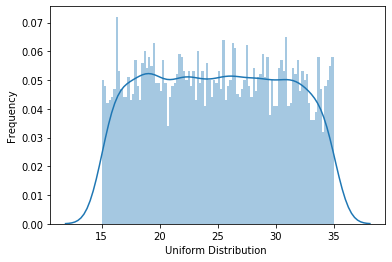

In [101]:
import seaborn as sns

# Make a histogram with Seaborn distplot
ax = sns.distplot(data, bins=100, kde=True)
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

In [120]:
import numpy as np
from scipy import stats

# Estimate the parameters of the distribution
print("The mean is {:.2f}".format(np.mean(data)))
print("The standard deviation is {:.2f}".format(np.std(data)))
print("The 0-th moment (area under curve) is {:.2f}".format(stats.moment(data, moment=0)))

The mean is 24.95
The standard deviation is 5.71
The 0-th moment (area under curve) is 1.00


### Gaussian Distribution

The Gaussian (or Normal) distribution is one of the most important in science as most measurements, variables values, or probabilities in a dataset or problem will be distributed in the shape of this curve. The *Central Limit Theorem* states that if you have a collection of random variables and sum them up, then the larger the collection, the closer the sum will be to a normal distribution.

The equation for a normalised Gaussian distribution is

$$f(x|\mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} exp \left [ {-\frac{(x - \mu)^2}{2 \sigma^2}} \right]$$

where $\mu$ and $sigma$ are the mean and standard deviation of the distribution, respectively. We can sample some data from the distribution and visualise it as before:

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

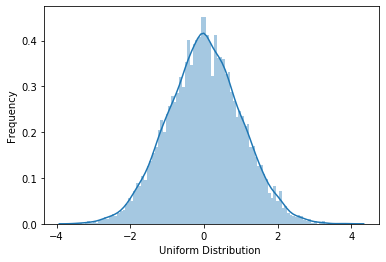

In [121]:
from scipy.stats import norm

# Generate the data
data = norm.rvs(size=10000,loc=0,scale=1)

# Make a histogram with Seaborn distplot
ax = sns.distplot(data, bins=100, kde=True)
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

and again we can just estimate the parameters as before:

In [122]:
# Estimate the parameters of the distribution
print("The mean is {:.2f}".format(np.mean(data)))
print("The standard deviation is {:.2f}".format(np.std(data)))
print("The 0-th moment (area under curve) is {:.2f}".format(stats.moment(data, moment=0)))

The mean is 0.01
The standard deviation is 1.00
The 0-th moment (area under curve) is 1.00


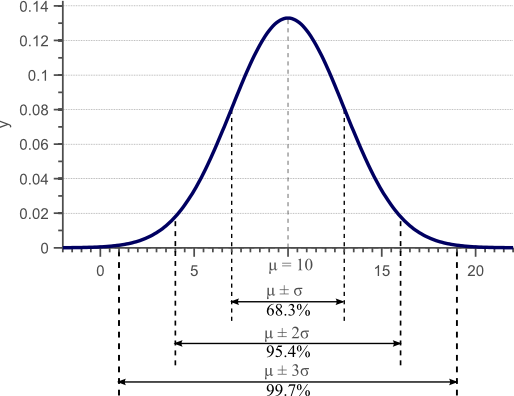

In [123]:
from IPython.display import Image
Image(filename='Images/gaussiandensity.png')

In science, we quote experimental results as $\sigma$ confidence levels. For example, the if the distribution described the background *noise* of an observation, then a result of '17' would sit at the $2\sigma$ confidence level - 95.4% of all random events would return values closer to the mean.